In [38]:
# Final Priject: Classifying Song Genres Using Audio Data

## Name: <span style="color:blue"> *Youness El Badr* </span>

In [40]:
## Name: <span style="color:blue"> *Youness El Badr* </span>

In [27]:
# Data Loading and Exploration

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load the data
data = pd.read_csv('fma-rock-vs-hiphop.csv')

# Display a preview of the data
print(data.head())

# Check the column names and data types
print(data.info())

# Summary statistics of the dataset
print(data.describe())

   track_id  bit_rate  comments        composer         date_created  \
0       135    256000         1             NaN  2008-11-26 01:43:26   
1       136    256000         1             NaN  2008-11-26 01:43:35   
2       151    192000         0             NaN  2008-11-26 01:44:55   
3       152    192000         0             NaN  2008-11-26 01:44:58   
4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

  information interest  language_code  \
0         NaN     2484             en   
1         NaN     1948             en   
2         N

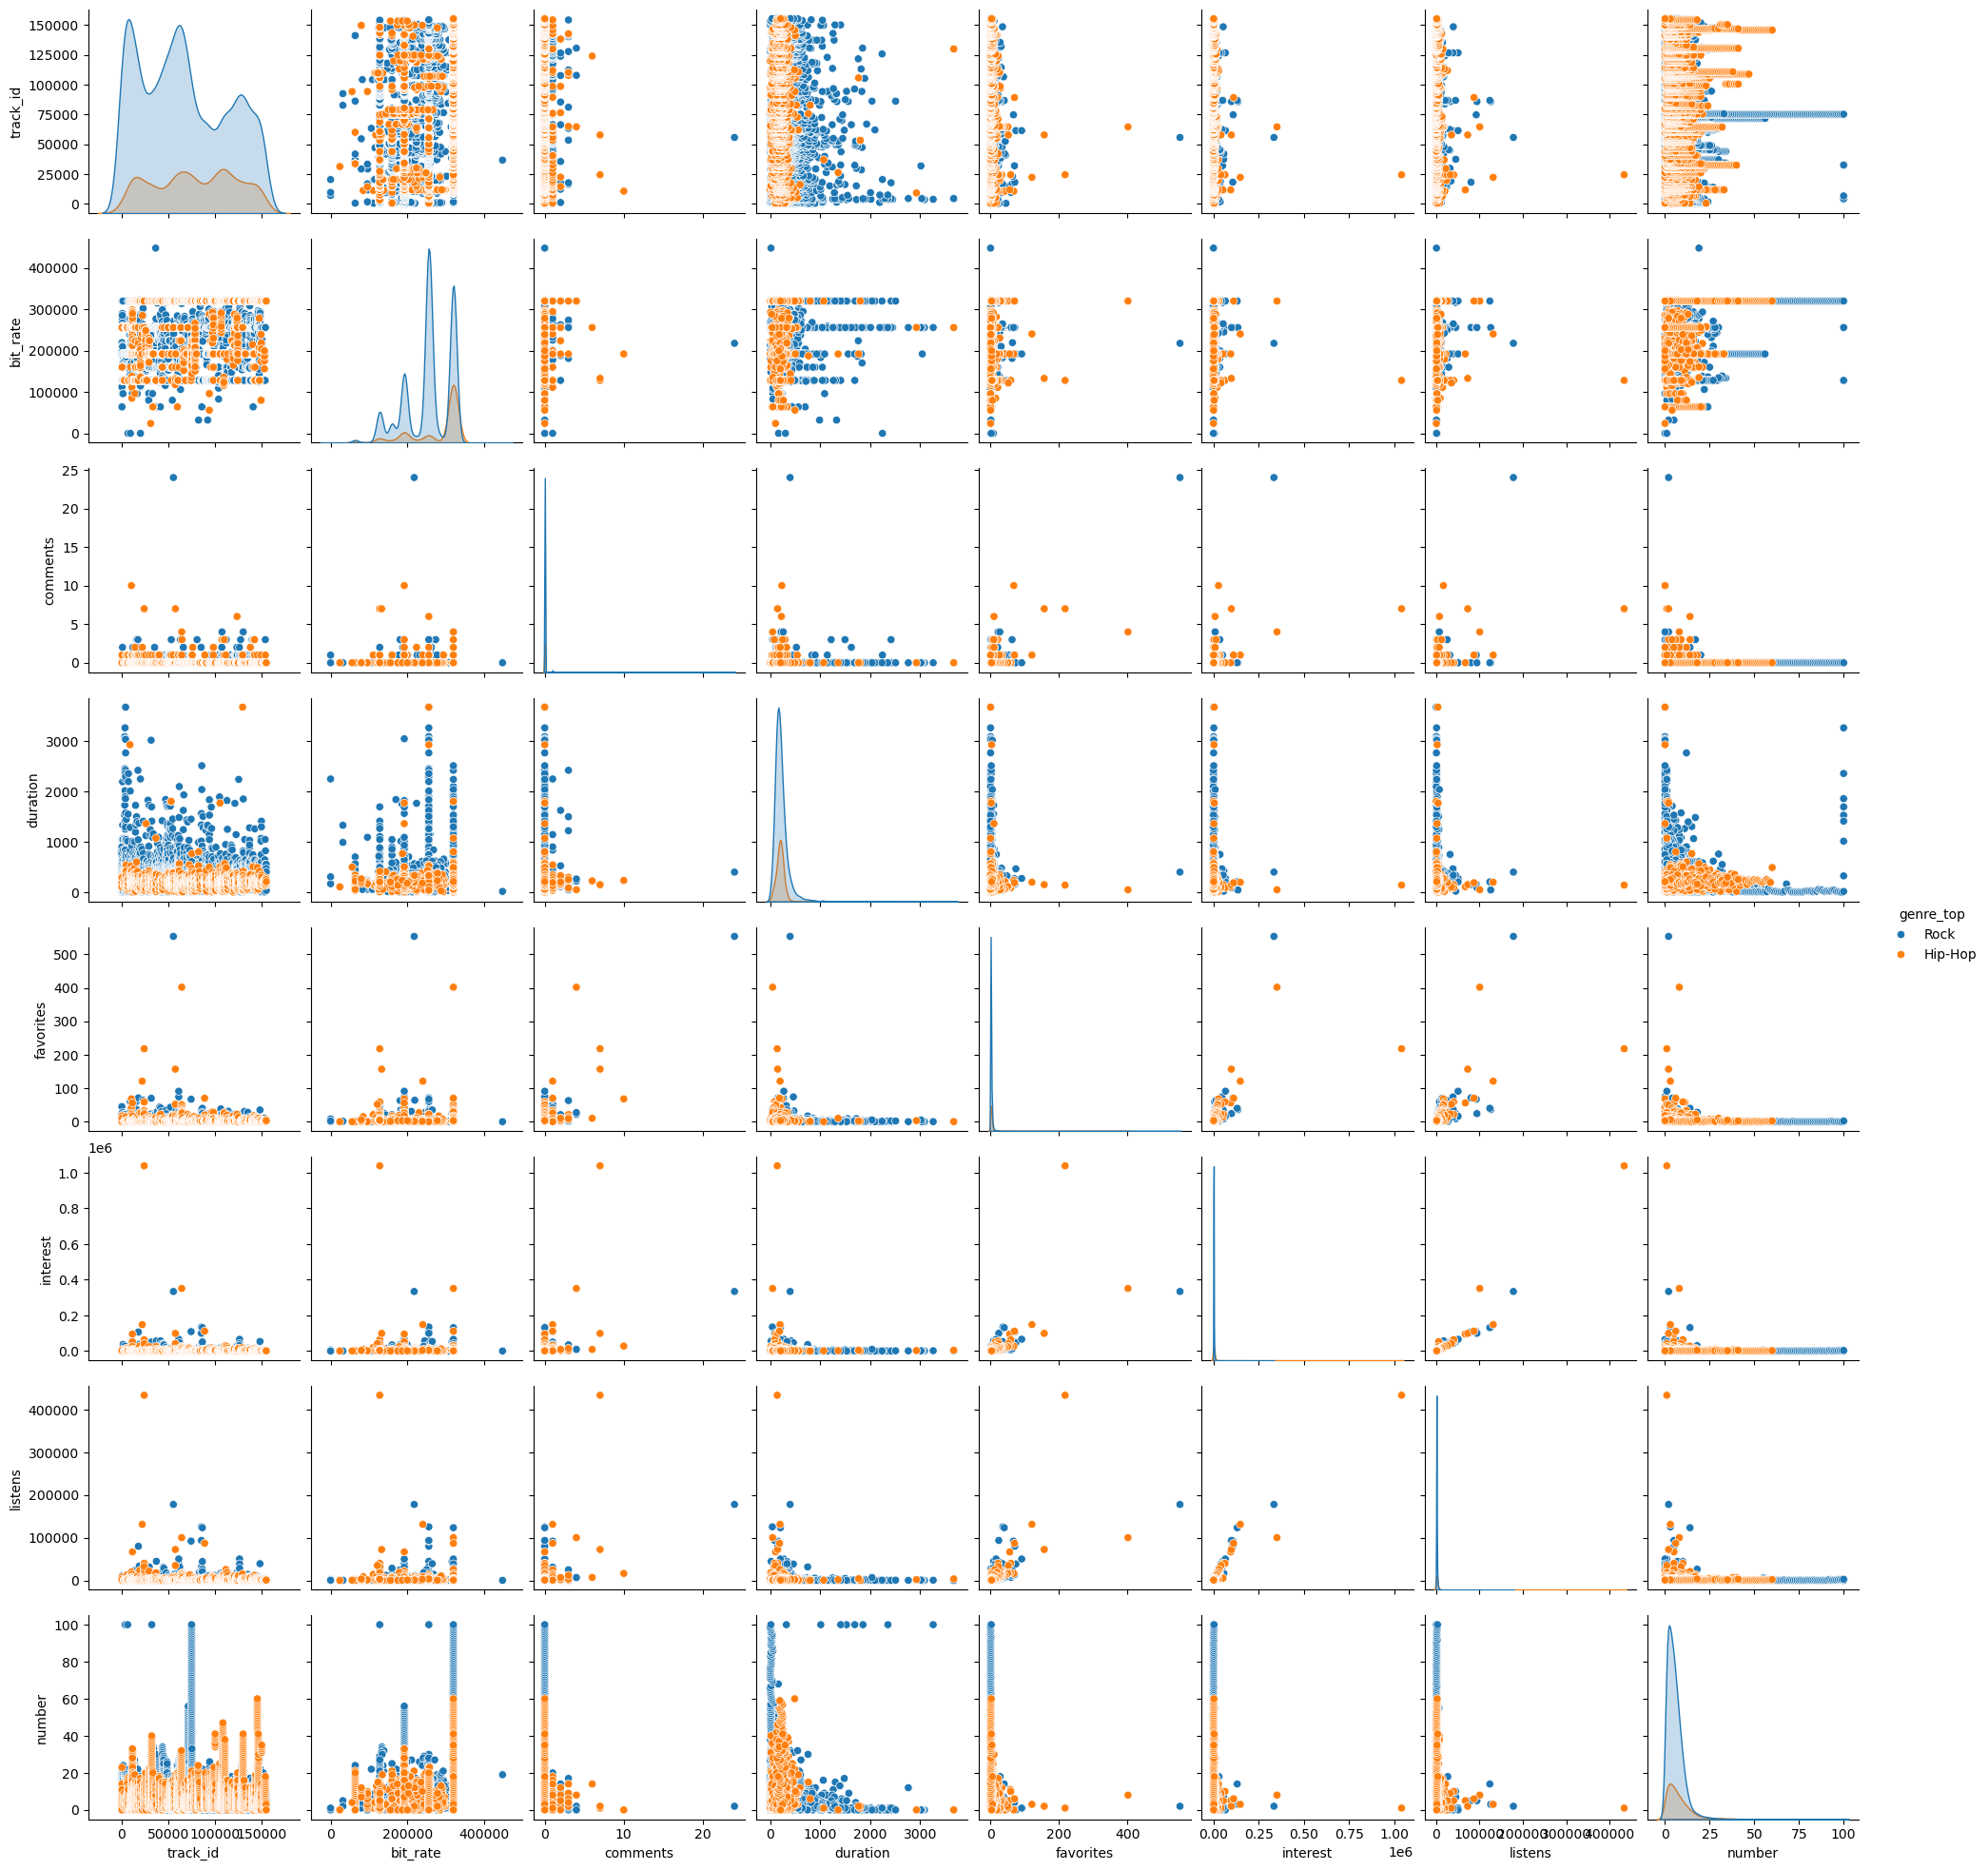

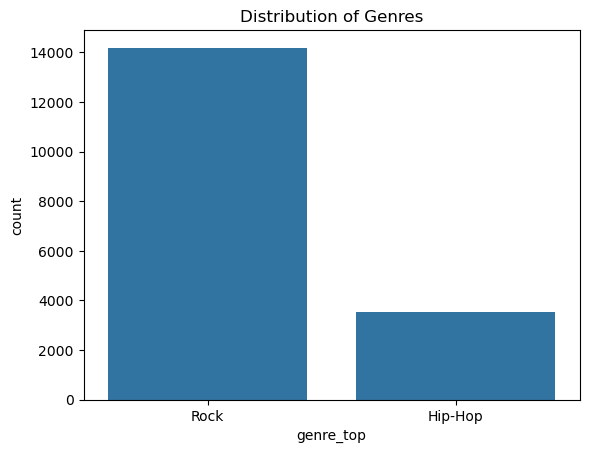

In [30]:
# Visualization
# Pairplot to visualize relationships between numerical features
sns.pairplot(data, hue='genre_top')
plt.show()

# Distribution of genres
sns.countplot(x='genre_top', data=data)
plt.title('Distribution of Genres')
plt.show()

In [31]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoder = LabelEncoder()
data['composer'] = label_encoder.fit_transform(data['composer'].astype(str))
data['date_recorded'] = label_encoder.fit_transform(data['date_recorded'].astype(str))
data['title'] = label_encoder.fit_transform(data['title'].astype(str))
data['language_code'] = label_encoder.fit_transform(data['language_code'].astype(str))

# Fill missing values if any
data.fillna(0, inplace=True)

# Extract features and target variable
features = ['bit_rate', 'listens', 'language_code', 'composer', 'track_id', 'title', 'date_recorded']
X = data[features]
y = data['genre_top']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Logistic Regression Accuracy: 0.7972185679383574


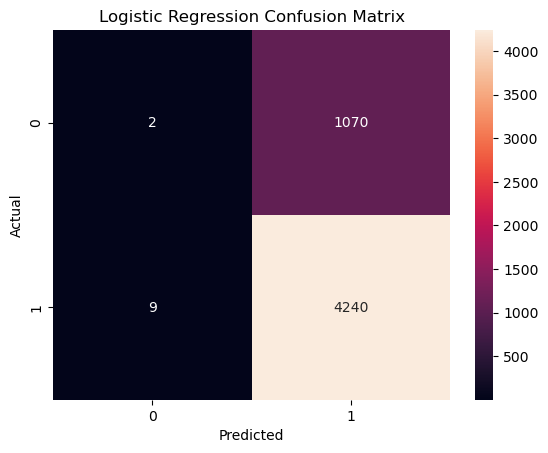

In [32]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate the logistic regression model
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

# Confusion matrix for logistic regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.9067844390152227


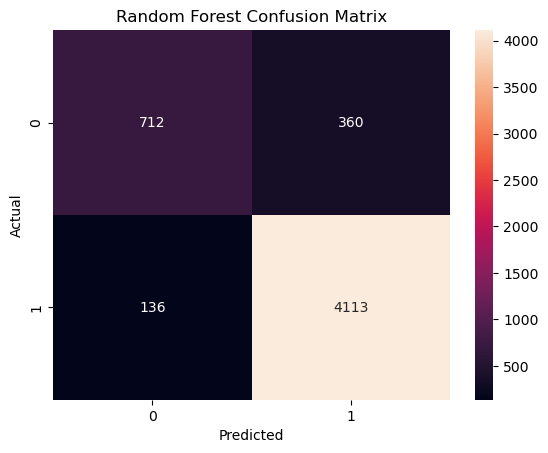

In [36]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the random forest model
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Confusion matrix for random forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()